In [157]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [158]:
telcom = pd.read_csv("./datasets/churn-bigml-20.csv")
telcom.head(5)

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

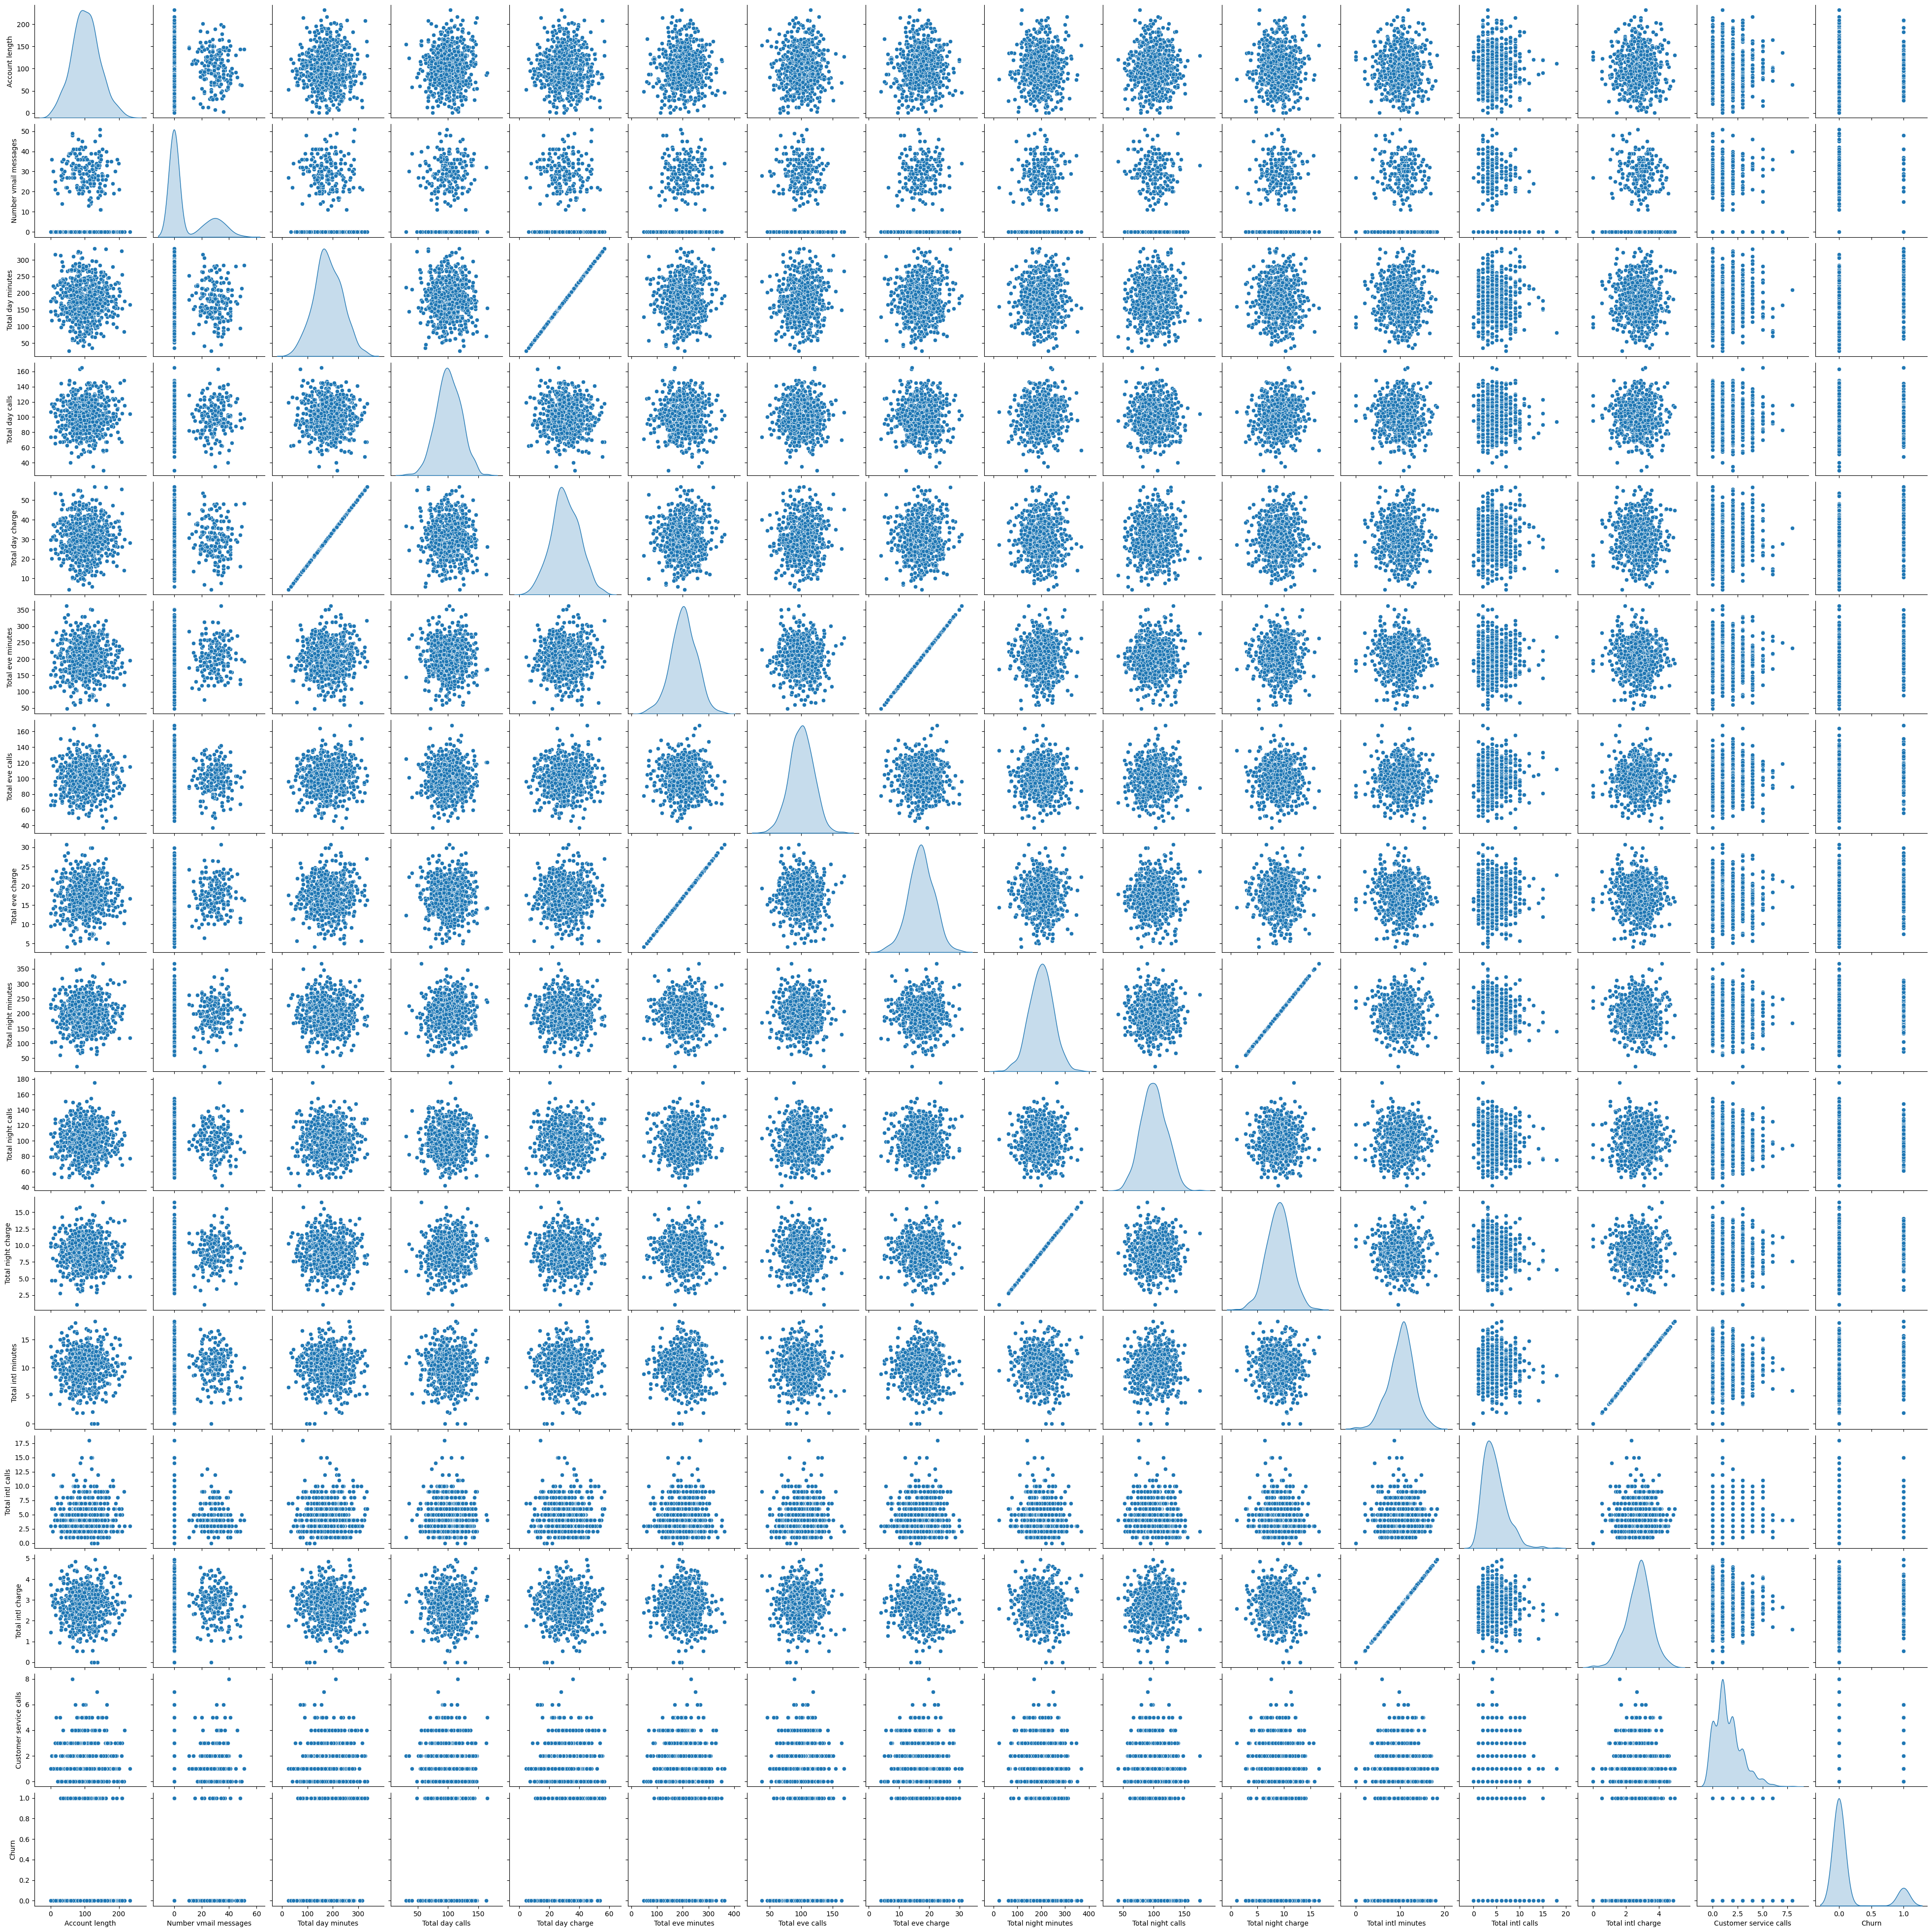

In [159]:
out_cols = list(set(telcom.nunique()[telcom.nunique()<6].keys().tolist()
                    + telcom.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in telcom.columns if x not in out_cols] + ['Churn']

sns.pairplot(telcom[viz_cols], diag_kind="kde")
plt.show()

In [160]:
def data_summary(data):
    print("DATA IS AS FOLLOWS:\n\n")
    print("shape of data is: ",data.shape)
    print("\nlables of data are: ",data.columns.tolist())
    print("\nlables of data are: ",data.isnull().sum().values.sum())
    print("\nUnique values:")
    print(f"{data.nunique()}")

In [161]:
data_summary(telcom)

DATA IS AS FOLLOWS:


shape of data is:  (667, 20)

lables of data are:  ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

lables of data are:  0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls

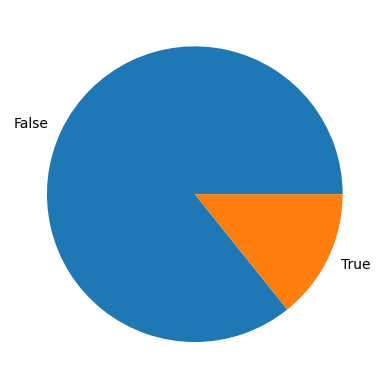

In [162]:
plt.pie(telcom['Churn'].value_counts().values.tolist(),labels=telcom['Churn'].unique().tolist())
plt.show()

MUNGING

In [163]:
data_summary(telcom)

DATA IS AS FOLLOWS:


shape of data is:  (667, 20)

lables of data are:  ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

lables of data are:  0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls

In [184]:
drop_cols= ['State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
new_telcom= telcom.drop(columns=drop_cols)
target = new_telcom["Churn"]
test_telcom= new_telcom.drop(columns=['Churn'])

0       No
1       No
2       No
3       No
4       No
      ... 
662    Yes
663    Yes
664     No
665     No
666     No
Name: Voice mail plan, Length: 667, dtype: object

In [166]:
# we can use this to one hot encode all the values of tables in pandas from string to lable int
def encode(x):
    for i in x.columns:
        if(x[i].dtype== 'O' or x[i].dtype== 'bool' or len(x[i].unique())< 5 ):
            print(f'replacing: {x[i].unique()}, to: {[i for i in range( len(x[i].unique()))]}')
            x.replace(x[i].unique(),[i for i in range( len(x[i].unique()))],inplace=True)
    return x


In [185]:
test_telcom = encode(test_telcom)
x = test_telcom
y = encode(pd.DataFrame(target))
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

replacing: ['No' 'Yes'], to: [0, 1]
replacing: [0 1], to: [0, 1]
replacing: [False  True], to: [0, 1]


In [194]:
telcom.describe(include='all').fillna('-')

State Account length   Area code International plan Voice mail plan  \
count    667          667.0       667.0                667             667   
unique    51              -           -                  2               2   
top       AZ              -           -                 No              No   
freq      19              -           -                614             478   
mean       -     102.841079  436.157421                  -               -   
std        -       40.81948   41.783305                  -               -   
min        -            1.0       408.0                  -               -   
25%        -           76.0       408.0                  -               -   
50%        -          102.0       415.0                  -               -   
75%        -          128.0       415.0                  -               -   
max        -          232.0       510.0                  -               -   

       Number vmail messages Total day minutes Total day calls  \
count                  667.0             667.0           667.0   
unique                     -                 -               -   
top                        -                 -               -   
freq                       -                 -               -   
mean                8.407796        180.948126      100.937031   
std                 13.99448         55.508628        20.39679   
min                      0.0              25.9            30.0   
25%                      0.0            146.25            87.5   
50%                      0.0             178.3           101.0   
75%                     20.0             220.7           115.0   
max                     51.0             334.3           165.0   

       Total day charge Total eve minutes Total eve calls Total eve charge  \
count             667.0             667.0           667.0            667.0   
unique                -                 -               -                -   
top                   -                 -               -                -   
freq                  -                 -               -                -   
mean          30.761769        203.355322      100.476762        17.285262   
std            9.436463         49.719268       18.948262          4.22616   
min                 4.4              48.1            37.0             4.09   
25%               24.86            171.05            88.0            14.54   
50%               30.31             203.7           101.0            17.31   
75%               37.52            236.45           113.0           20.095   
max               56.83             361.8           168.0            30.75   

       Total night minutes Total night calls Total night charge  \
count                667.0             667.0              667.0   
unique                   -                 -                  -   
top                      -                 -                  -   
freq                     -                 -                  -   
mean            199.685307        100.113943           8.985907   
std              49.759931         20.172505           2.239429   
min                   23.2              42.0               1.04   
25%                 167.95              86.0               7.56   
50%                  201.6             100.0               9.07   
75%                  231.5             113.5              10.42   
max                  367.7             175.0              16.55   

       Total intl minutes Total intl calls Total intl charge  \
count               667.0            667.0             667.0   
unique                  -                -                 -   
top                     -                -                 -   
freq                    -                -                 -   
mean            10.238381         4.527736          2.764948   
std               2.80785         2.482442          0.758167   
min                   0.0              0.0               0.0   
25%                   8

In [195]:
x.describe(include='all')

Account length  International plan  Voice mail plan  \
count      667.000000          667.000000       667.000000   
mean       102.841079            0.079460         0.283358   
std         40.819480            0.270659         0.450967   
min          1.000000            0.000000         0.000000   
25%         76.000000            0.000000         0.000000   
50%        102.000000            0.000000         0.000000   
75%        128.000000            0.000000         1.000000   
max        232.000000            1.000000         1.000000   

       Number vmail messages  Total day minutes  Total day calls  \
count             667.000000         667.000000       667.000000   
mean                8.407796         180.948126       100.937031   
std                13.994480          55.508628        20.396790   
min                 0.000000          25.900000        30.000000   
25%                 0.000000         146.250000        87.500000   
50%                 0.000000         178.300000       101.000000   
75%                20.000000         220.700000       115.000000   
max                51.000000         334.300000       165.000000   

       Total eve minutes  Total eve calls  Total night minutes  \
count         667.000000       667.000000           667.000000   
mean          203.355322       100.476762           199.685307   
std            49.719268        18.948262            49.759931   
min            48.100000        37.000000            23.200000   
25%           171.050000        88.000000           167.950000   
50%           203.700000       101.000000           201.600000   
75%           236.450000       113.000000           231.500000   
max           361.800000       168.000000           367.700000   

       Total night calls  Total intl minutes  Total intl calls  \
count         667.000000          667.000000        667.000000   
mean          100.113943           10.238381          4.527736   
std            20.172505            2.807850          2.482442   
min            42.000000            0.000000          0.000000   
25%            86.000000            8.600000          3.000000   
50%           100.000000           10.500000          4.000000   
75%           113.500000           12.050000          6.000000   
max           175.000000           18.300000         18.000000   

       Customer service calls       Churn  
count              667.000000  667.000000  
mean                 1.563718    0.142429  
std                  1.333357    0.349752  
min                  0.000000    0.000000  
25%                  1.000000    0.000000  
50%                  1.000000    0.000000  
75%                  2.000000    0.000000  
max                  8.000000    1.000000

In [168]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor()

In [170]:
pred= model.predict(x_test)
pred= np.where(pred<0.5,0,1)

<AxesSubplot: >

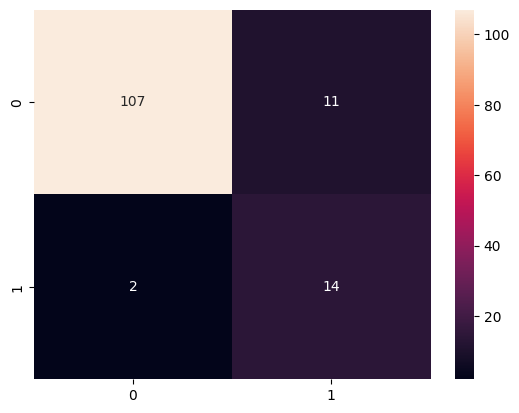

In [171]:
# generating a visual analysis of predictions using confusion matrix and seaborn library to generate matrix and heatmaps respectively
res = confusion_matrix(pred,y_test)
sns.heatmap(res, annot=True, fmt='g')

In [172]:
import shap

In [173]:
explainer = shap.Explainer(model.predict, x_test)
shap_values = explainer(x_test)

Permutation explainer: 135it [00:29,  3.14it/s]                         


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


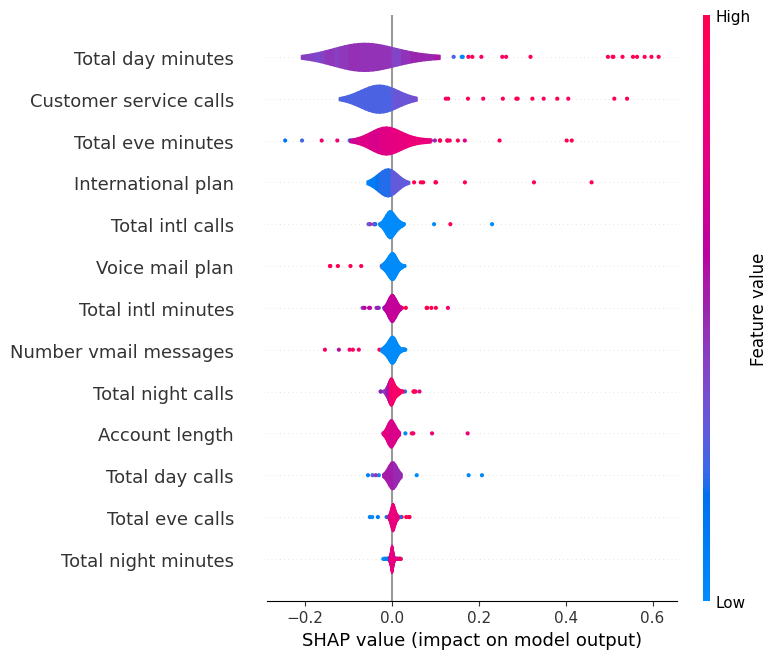

In [174]:
shap.summary_plot(shap_values,plot_type='violin')

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.


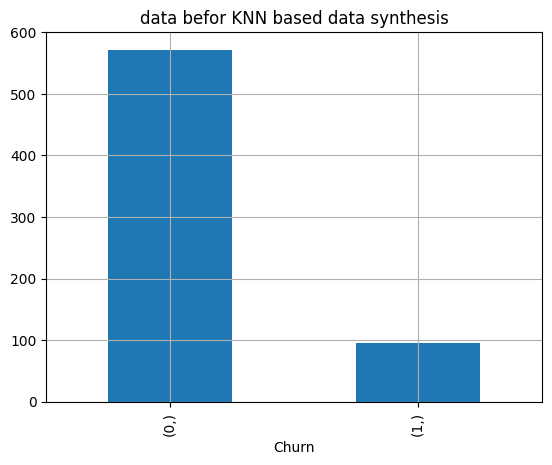

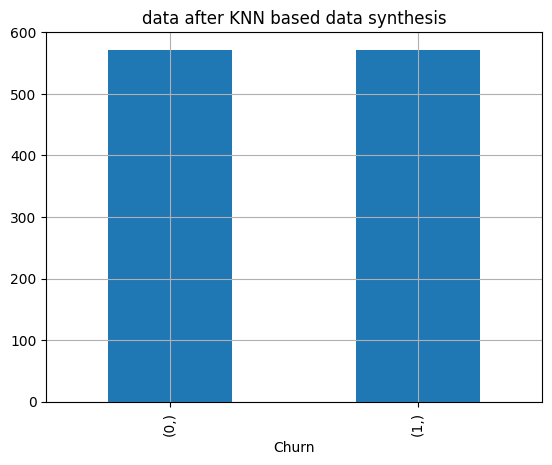

In [175]:
from imblearn.over_sampling import  SMOTE

smote = SMOTE(n_jobs=-1)
x_syn, y_syn = smote.fit_resample(x, y)
y.value_counts().plot(kind='bar',title='data befor KNN based data synthesis').grid(True)
plt.show()
y_syn.value_counts().plot(kind='bar',title='data after KNN based data synthesis').grid(True)

In [176]:
xtrain2 , xtest2 ,ytrain2 , ytest2= train_test_split(x,y,test_size=0.5)
xtrain , xtest , ytrain , ytest= train_test_split(x_syn,y_syn,test_size=0.2)

In [177]:
model2=RandomForestRegressor()
model2.fit(x_syn,y_syn)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor()

In [178]:
pred= model2.predict(xtest)
pred= np.where(pred<0.5,0,1)

<AxesSubplot: >

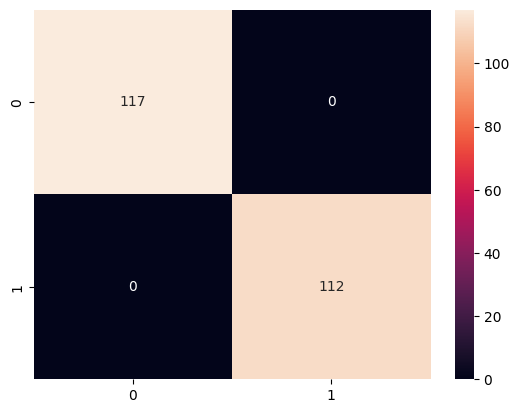

In [179]:
# generating a visual analysis of predictions using confusion matrix and seaborn library to generate matrix and heatmaps respectively
res = confusion_matrix(pred,ytest)
sns.heatmap(res, annot=True, fmt='g')

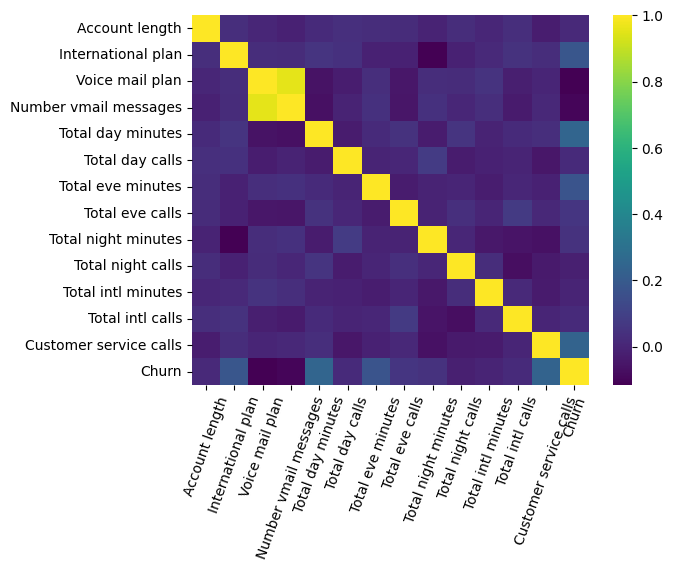

['Account length',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total eve minutes',
 'Total eve calls',
 'Total night minutes',
 'Total night calls',
 'Total intl minutes',
 'Total intl calls',
 'Customer service calls',
 'Churn']

In [189]:
test_telcom['Churn'] = y
correlations = test_telcom.corr(numeric_only=True)
matrix_cols = correlations.columns.tolist()
corr_array = np.array(correlations)
sns.heatmap(corr_array, yticklabels=matrix_cols, xticklabels=matrix_cols,fmt='g',cmap='viridis')
plt.xticks(rotation=70)
plt.show()
matrix_cols
